In [6]:
import sys
from pathlib import Path
parent_dir = Path.cwd().parent
sys.path.append(str(parent_dir))

from PIL import Image
import sys
from pathlib import Path
from PIL import Image
import torch
from molmo_utils import load_model, do_inference, get_coordinates, calculate_probability_of_coordinates
from utils import extract_all, plot_scatter, calculate_euclidian_distance

In [2]:
model_name = 'allenai/Molmo-7B-D-0924'
model, processor = load_model(model_name)

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

In [10]:
def run_experiment(path_to_experiments, prompt_starts, prompt_ends, runs_per_task):
    tasks, images, ground_truths, _ = extract_all(path_to_experiments)
    softmax_fn = torch.nn.Softmax(dim=-1)
    
    distance_what = []
    dist_where = []
    
    prob_what = []
    prob_where = []
    
    distances_per_task = []
    probs_per_task = []
    for i in range(len(tasks)):
        task = tasks[i]
        ground_truth = ground_truths[i]
        prompt_what = prompt_starts[0] + task + prompt_ends[0]
        prompt_where = prompt_starts[1] + task + prompt_ends[1]
        print(f"Task: {task}")
    
        distances = [[],[]]
        probs = [[],[]]
    
        with Image.open(images[i]) as image:
            image_width = image.width
            image_height = image.height
    
            prompts = [prompt_what]
            if (len(ground_truth) == 2):
                prompts.append(prompt_where)
    
            for k in range(len(prompts)):
                for j in range(runs_per_task):
                    output_text, output, inputs = do_inference(image, prompts[k], model, processor)
                    
                    coordinates = get_coordinates(output_text, image_width, image_height)
                    if len(coordinates) == 1:
                        euc_dist = calculate_euclidian_distance(coordinates[0], ground_truth[k])
                        coord_probs = calculate_probability_of_coordinates(output, inputs, processor)
                        
                        distances[k].append(euc_dist)
                        probs[k].append(coord_probs)
    
        # Per task output
        distances_per_task.append(distances[0] + distances[1])
        probs_per_task.append(probs[0] + probs[1])
    
        # Object to move / where to place output
        distance_what.append(distances[0])
        prob_what.append(probs[0])
        if (distances[1] != []):
            dist_where.append(distances[1])
            prob_where.append(probs[1])
        
    
    dists = [distance_what, dist_where]
    probs_2 = [prob_what, prob_where]
            
    plot_scatter(tasks, probs_per_task, distances_per_task, "Scatterplot for every task")
    plot_scatter(["Object to move", "Where to place"], probs_2, dists, "Scatterplot for difference between object and where to place")

Task: pull the oven tray
Task: move the fruit from the left stove to the sink
Task: open low fridge
Task: open the drawer
Task: Move the can from the top left of the burner to the bottom left of the burner
Task: Place the pot to the right of the blue fork.
Task: move the pot from the right to the left stove
Task: put potato in pot or pan
Task: take cucumber out of cup
Task: move the banana from the left stove to the sink
Task: pick up the toast and put it to the sink
Task: close the microwave
Task: push the toaster lever
Task: pick up glass cup
Task: take the broccoli and put it between the two right burners
Task: move the pot from the left to the right stove


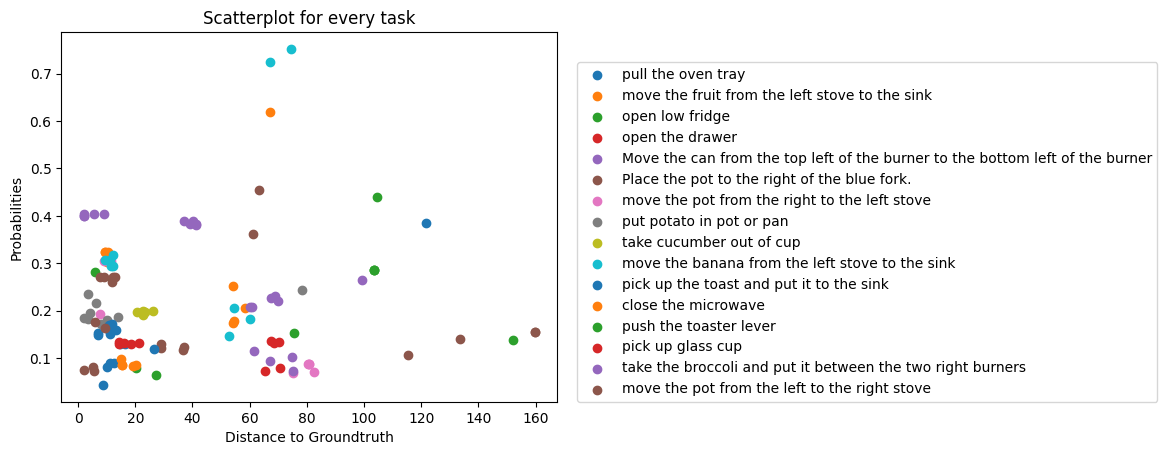

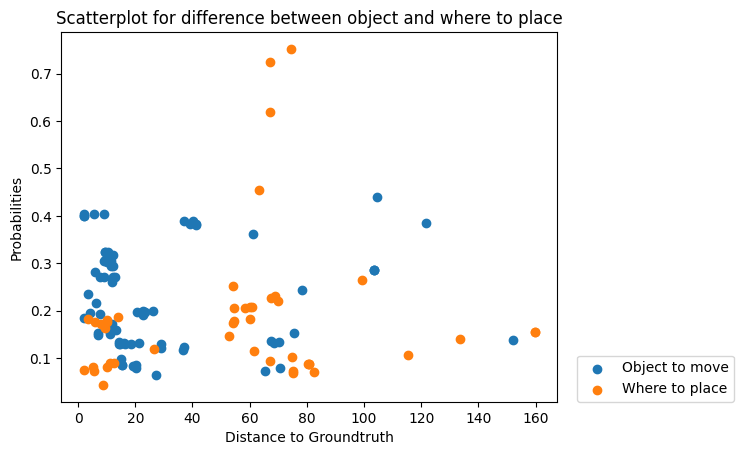

In [11]:
# Default Prompts
experiment_path = "../data/base_experiments"
num_runs = 5

prompt_starts = ["You are the robot in the picture. Your task is to: ", "You are the robot in the picture. Your task is to: "]
prompt_ends = [" To complete this task, do one thing. 1. Find the relevant object and point to it. Your output format should be like this: (x1, y1) with (x1, y1) beeing the coordinates of the object to move. Dont output anything else.", " To complete this task, do one thing. 1. Point to the location where the relevant object should be moved to. Your output format should be like this: (x1, y1) with (x1, y1) beeing the coordinates where the relevant object should be moved to. Dont output anything else."]

run_experiment(experiment_path, prompt_starts, prompt_ends, num_runs)

Task: pull the oven tray
Task: move the fruit from the left stove to the sink
Task: open low fridge
Task: open the drawer
Task: Move the can from the top left of the burner to the bottom left of the burner
Task: Place the pot to the right of the blue fork.
Task: move the pot from the right to the left stove
Task: put potato in pot or pan
Task: take cucumber out of cup
Task: move the banana from the left stove to the sink
Task: pick up the toast and put it to the sink
Task: close the microwave
Task: push the toaster lever
Task: pick up glass cup
Task: take the broccoli and put it between the two right burners
Task: move the pot from the left to the right stove


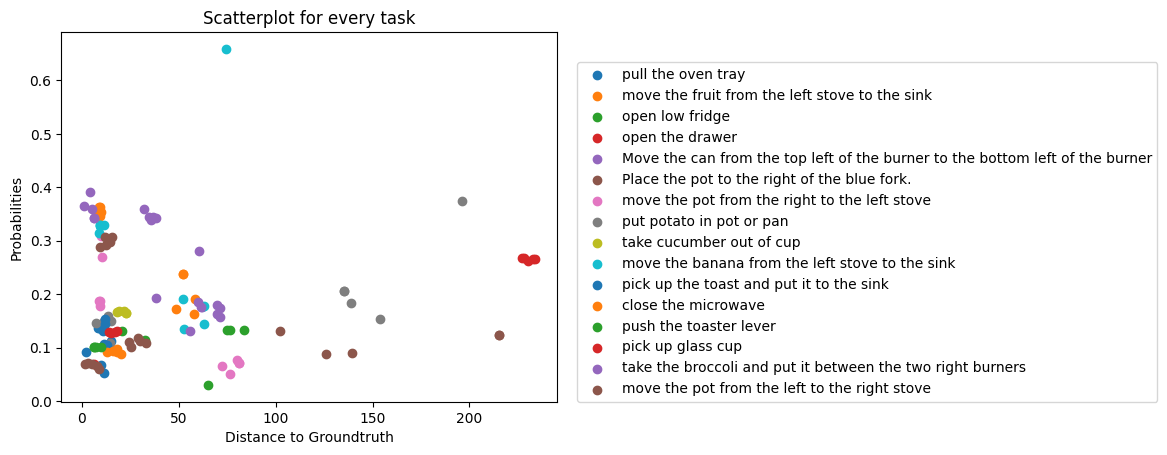

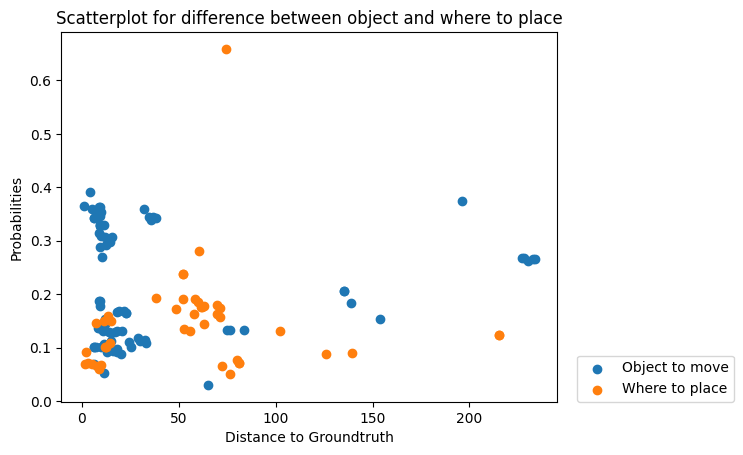

In [13]:
experiment_path = "../data/base_experiments"
num_runs = 5

prompt_starts = ["You are the robot in the picture. Your mission is to point to the relevant object for the following task the user gave you: ", "You are the robot in the picture. Your mission is to point to the place in the picture the object has to be moved to. The taks is as follows: "]
prompt_ends = [" Your output format should be like this: (x1, y1) with (x1, y1) beeing the coordinates of the object to move. Dont output anything else.", " Your output format should be like this: (x1, y1) with (x1, y1) beeing the coordinates where the object has to be moved to. Dont output anything else."]

run_experiment(experiment_path, prompt_starts, prompt_ends, num_runs)

Task: pull the oven tray
Task: move the fruit from the left stove to the sink
Task: open low fridge
Task: open the drawer
Task: Move the can from the top left of the burner to the bottom left of the burner
Task: Place the pot to the right of the blue fork.
Task: move the pot from the right to the left stove
Task: put potato in pot or pan
Task: take cucumber out of cup
Task: move the banana from the left stove to the sink
Task: pick up the toast and put it to the sink
Task: close the microwave
Task: push the toaster lever
Task: pick up glass cup
Task: take the broccoli and put it between the two right burners
Task: move the pot from the left to the right stove


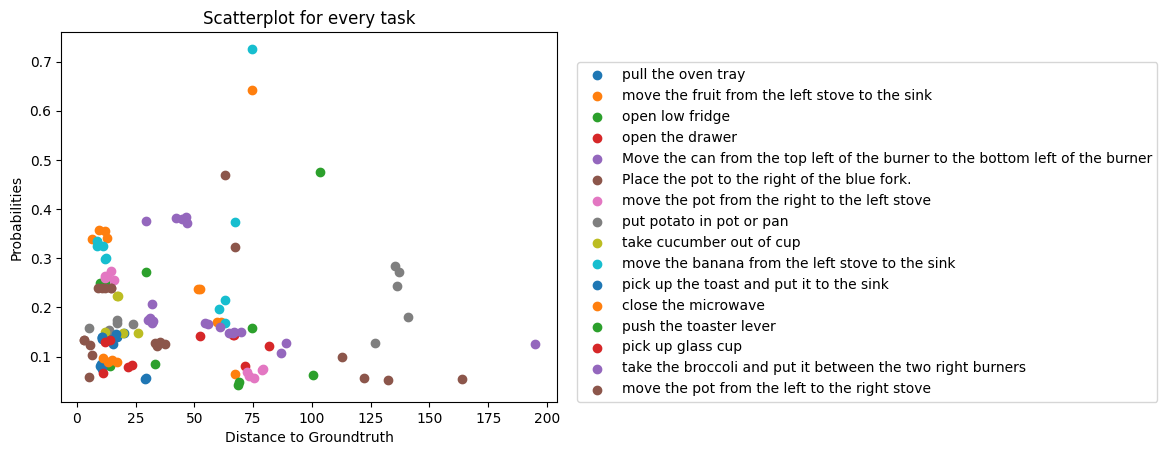

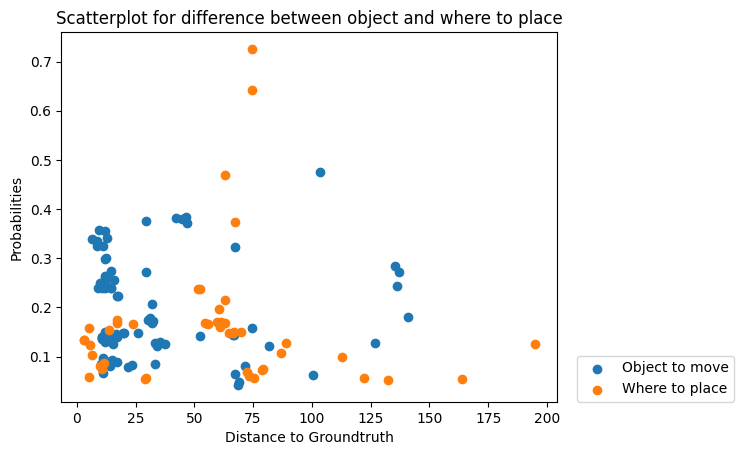

In [15]:
experiment_path = "../data/base_experiments"
num_runs = 5

prompt_starts = ["You are the robot in the picture. Your mission it to guide and support the user in its task to: ", "You are the robot in the picture. Your mission it to guide and support the user in its task to: "]
prompt_ends = [" For that you have to point to the relevant object in the picture. Your output format should be like this: (x1, y1) with (x1, y1) beeing the coordinates of the object to move. Dont output anything else.", " For that you have to point to the place in the picture where the object has to be moved to. Your output format should be like this: (x1, y1) with (x1, y1) beeing the coordinates of the place where the object has to be moved to. Dont output anything else."]

run_experiment(experiment_path, prompt_starts, prompt_ends, num_runs)

Task: pull the oven tray
Task: move the fruit from the left stove to the sink
Task: open low fridge
Task: open the drawer
Task: Move the can from the top left of the burner to the bottom left of the burner
Task: Place the pot to the right of the blue fork.
Task: move the pot from the right to the left stove
Task: put potato in pot or pan
Task: take cucumber out of cup
Task: move the banana from the left stove to the sink
Task: pick up the toast and put it to the sink
Task: close the microwave
Task: push the toaster lever
Task: pick up glass cup
Task: take the broccoli and put it between the two right burners
Task: move the pot from the left to the right stove


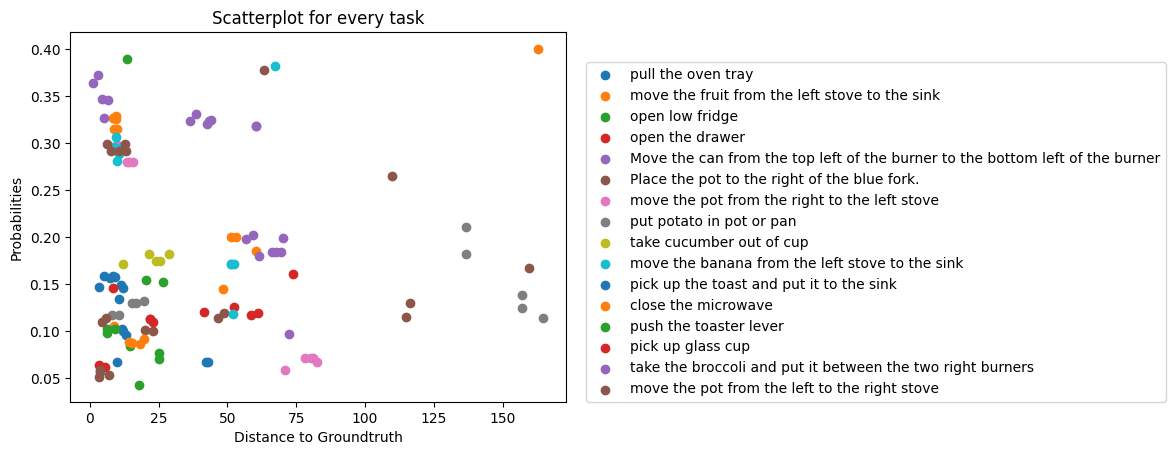

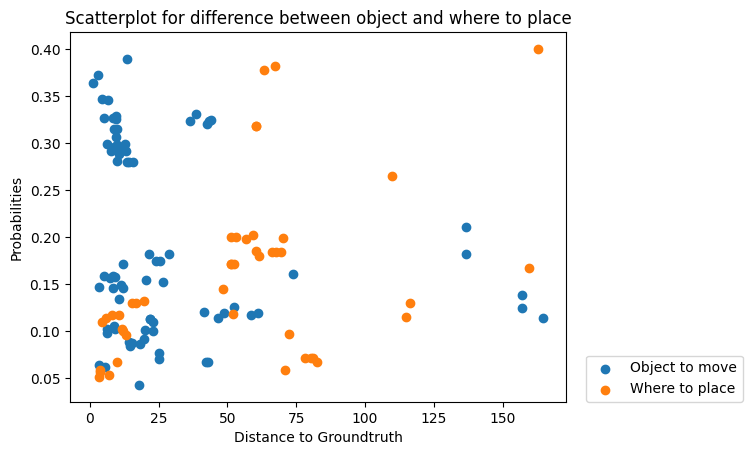

In [16]:
experiment_path = "../data/base_experiments"
num_runs = 5

prompt_starts = ["You are the robot in the picture. Your mission is to point to the relevant object for the following task the user gave you: ", "You are the robot in the picture. Your mission is to point to the place in the picture the object has to be moved to. The taks is as follows: "]
prompt_ends = [" It is absolutely crucial that your points are precise. Your output format should be like this: (x1, y1) with (x1, y1) beeing the coordinates of the object to move. Dont output anything else.", " It is absolutely crucial that your points are precise. Your output format should be like this: (x1, y1) with (x1, y1) beeing the coordinates where the object has to be moved to. Dont output anything else."]

run_experiment(experiment_path, prompt_starts, prompt_ends, num_runs)

Task: pull the oven tray
Task: move the fruit from the left stove to the sink
Task: open low fridge
Task: open the drawer
Task: Move the can from the top left of the burner to the bottom left of the burner
Task: Place the pot to the right of the blue fork.
Task: move the pot from the right to the left stove
Task: put potato in pot or pan
Task: take cucumber out of cup
Task: move the banana from the left stove to the sink
Task: pick up the toast and put it to the sink
Task: close the microwave
Task: push the toaster lever
Task: pick up glass cup
Task: take the broccoli and put it between the two right burners
Task: move the pot from the left to the right stove


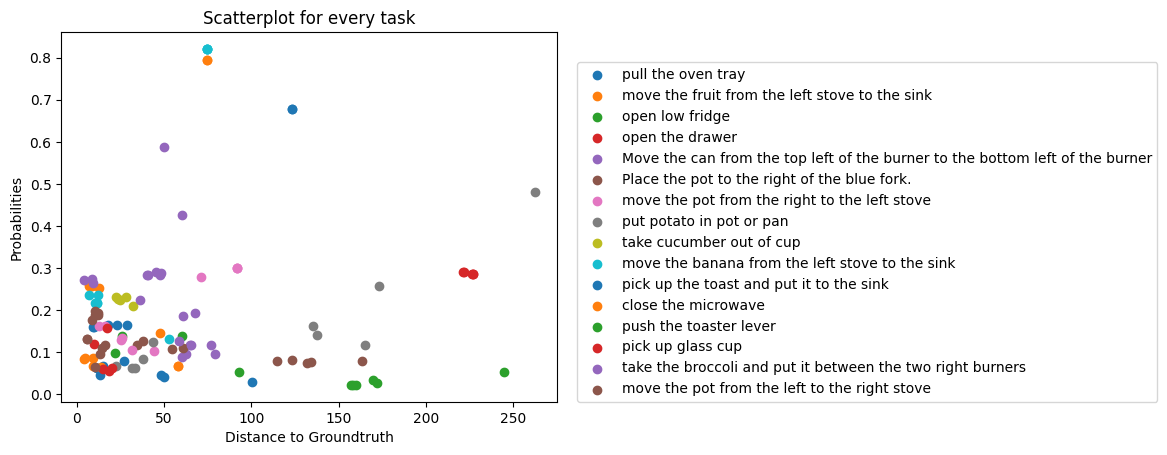

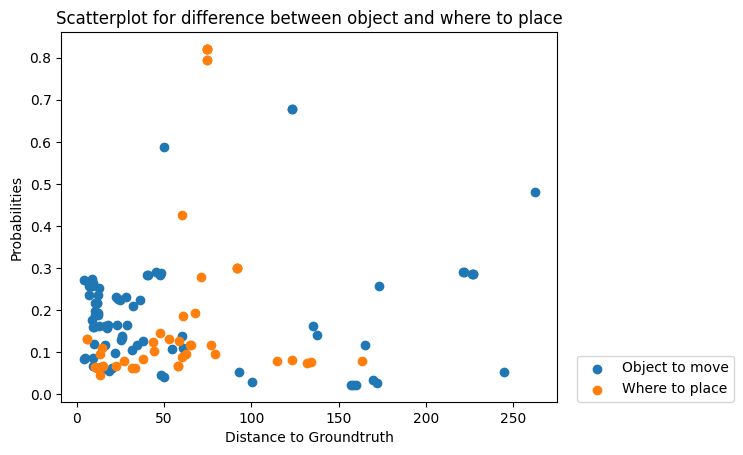

In [17]:
experiment_path = "../data/base_experiments"
num_runs = 5

prompt_starts = ["You are the robot in the picture. You are supporting the user in the task: ", "You are the robot in the picture. You are supporting the user in the task: "]
prompt_ends = [" For that you have to precisely point to the coordinates of the object the user has to move. Your output format should be like this: (x1, y1) with (x1, y1) beeing the coordinates of the object to move. Dont output anything else.", " For that you have to precisely point to the coordinates where the user has to move the object to. Your output format should be like this: (x1, y1) with (x1, y1) beeing the coordinates where the object has to be moved to. Dont output anything else."]

run_experiment(experiment_path, prompt_starts, prompt_ends, num_runs)

Task: pull the oven tray
Task: move the fruit from the left stove to the sink
Task: open low fridge
Task: open the drawer
Task: Move the can from the top left of the burner to the bottom left of the burner
Task: Place the pot to the right of the blue fork.
Task: move the pot from the right to the left stove
Task: put potato in pot or pan
Task: take cucumber out of cup
Task: move the banana from the left stove to the sink
Task: pick up the toast and put it to the sink
Task: close the microwave
Task: push the toaster lever
Task: pick up glass cup
Task: take the broccoli and put it between the two right burners
Task: move the pot from the left to the right stove


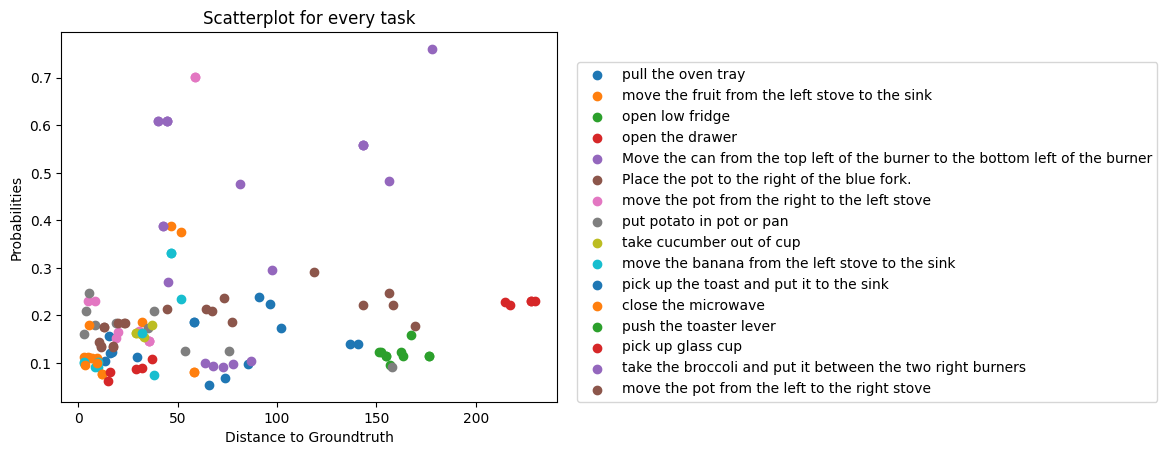

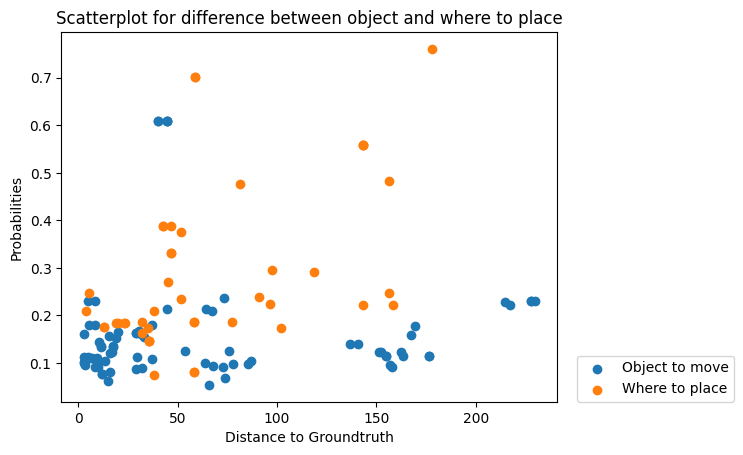

In [19]:
experiment_path = "../data/base_experiments"
num_runs = 5


prompt_starts = [
    "You are an advanced vision-language model assisting a robotic arm. Your task is to precisely determine the exact coordinates of the object to pick up based on the given instruction. Carefully analyze the scene and output the best coordinate for the robotic arm to target: ",
    "You are an advanced vision-language model assisting a robotic arm. Your task is to precisely determine the exact coordinates where the robotic arm should place the object after picking it up. Carefully analyze the scene and output the best coordinate for the placement based on the instruction: "
]

prompt_ends = [
    " Output only a single coordinate pair (x1, y1) representing the most precise position of the object to be picked up. Ensure minimal deviation from its actual location. Avoid estimating or guessing.",
    " Output only a single coordinate pair (x1, y1) representing the most precise placement location for the object. Consider spatial context and avoid ambiguous locations. Ensure the placement is feasible for a robotic arm. Avoid estimating or guessing."
]


run_experiment(experiment_path, prompt_starts, prompt_ends, num_runs)

In [ ]:
experiment_path = "../data/base_experiments"
num_runs = 5


prompt_starts = [
    "You are the robot in the picture. Your mission is to accurately point to the exact center of the relevant object for the following task the user gave you: ", 
    "You are the robot in the picture. Your mission is to precisely identify the most appropriate placement location in the picture for the object. The task is as follows: "
]

prompt_ends = [
    " Your output format must be a single coordinate pair (x1, y1), representing the exact center of the object to move. Do not estimate or guess, and do not output anything else.", 
    " Your output format must be a single coordinate pair (x1, y1), representing the most precise and realistic placement location. Ensure the location is feasible for a robotic arm. Do not output anything else."
]



run_experiment(experiment_path, prompt_starts, prompt_ends, num_runs)

Task: pull the oven tray
Task: move the fruit from the left stove to the sink
Task: open low fridge
Task: open the drawer
Task: Move the can from the top left of the burner to the bottom left of the burner
Task: Place the pot to the right of the blue fork.
Task: move the pot from the right to the left stove
Task: put potato in pot or pan
Task: take cucumber out of cup
Task: move the banana from the left stove to the sink
Task: pick up the toast and put it to the sink
Task: close the microwave
Task: push the toaster lever
Task: pick up glass cup
Task: take the broccoli and put it between the two right burners
Task: move the pot from the left to the right stove
